In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [27]:
Games_df = pd.read_csv('./Data/with_ratingvotes.csv')

# Display the first few rows
print(Games_df.head())

                         name    year  rating    votes  Action  Adventure  \
0                  Spider-Man  2018.0     9.2  20759.0    True       True   
1      Red Dead Redemption II  2018.0     9.7  35703.0    True       True   
2          Grand Theft Auto V  2013.0     9.5  59986.0    True      False   
3                  God of War  2018.0     9.6  26118.0    True       True   
4  Uncharted 4: A Thief's End  2016.0     9.5  28722.0    True       True   

   Comedy  Crime  Family  Fantasy  Mystery  Sci-Fi  Thriller  
0   False  False   False     True    False   False     False  
1   False   True   False    False    False   False     False  
2   False   True   False    False    False   False     False  
3   False  False   False    False    False   False     False  
4   False  False   False    False    False   False     False  


In [28]:
# Select only the numerical features
numerical_features = Games_df[['year', 'rating', 'votes']]

# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame to hold the scaled data
scaled_df = pd.DataFrame(scaled_features, columns=['year', 'rating', 'votes'])

# Combine the scaled data with the other features
features = pd.concat([scaled_df, Games_df.iloc[:, 4:]], axis=1)

# For later use
features2 = features.copy()

print(features.head())

       year    rating      votes  Action  Adventure  Comedy  Crime  Family  \
0  1.224895  1.742687   7.446215    True       True   False  False   False   
1  1.224895  2.147485  12.974548    True       True   False   True   False   
2  0.757138  1.985565  21.957719    True      False   False   True   False   
3  1.224895  2.066525   9.428706    True       True   False  False   False   
4  1.037792  1.985565  10.392021    True       True   False  False   False   

   Fantasy  Mystery  Sci-Fi  Thriller  
0     True    False   False     False  
1    False    False   False     False  
2    False    False   False     False  
3    False    False   False     False  
4    False    False   False     False  


In [29]:
# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to your data
dbscan.fit(features)

# Get the cluster labels for each sample
labels = dbscan.labels_

In [30]:
# Get the labels (cluster IDs) for each point
labels = dbscan.labels_

# Count unique labels (excluding noise if present)
n_clusters = len(np.unique(labels[labels != -1]))

print(f"Number of clusters: {n_clusters}")


Number of clusters: 93


In [31]:
# Create a new DataFrame for storing results
Games_df_93 = Games_df.copy()

# Add these labels to your DataFrame
Games_df_93['Cluster'] = labels

Games_df_93.head(10)

,name,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,Cluster
0,Spider-Man,2018.0,9.2,20759.0,True,True,False,False,False,True,False,False,False,-1
1,Red Dead Redemption II,2018.0,9.7,35703.0,True,True,False,True,False,False,False,False,False,-1
2,Grand Theft Auto V,2013.0,9.5,59986.0,True,False,False,True,False,False,False,False,False,-1
3,God of War,2018.0,9.6,26118.0,True,True,False,False,False,False,False,False,False,0
4,Uncharted 4: A Thief's End,2016.0,9.5,28722.0,True,True,False,False,False,False,False,False,False,-1
5,The Last of Us: Part II,2020.0,8.5,30460.0,True,True,False,False,False,False,False,False,False,-1
6,Horizon Forbidden West,2022.0,9.2,2979.0,True,True,False,False,False,False,True,False,False,-1
7,The Last of Us,2013.0,9.7,60590.0,True,True,False,False,False,False,False,False,False,-1
8,Detroit: Become Human,2018.0,9.2,16907.0,True,True,False,False,False,False,False,False,False,-1
9,Death Stranding,2019.0,8.8,8136.0,True,True,False,False,False,False,False,False,False,1


In [32]:
# Add 1 to labels temporarily for counting purpose
labels_temp = labels + 1

# Count the occurrences of each cluster ID
counts = np.bincount(labels_temp)

for cluster_id, count in enumerate(counts):
    print(f"Cluster ID {cluster_id - 1} : {count} rows")

Cluster ID -1 : 1285 rows
Cluster ID 0 : 5 rows
Cluster ID 1 : 6 rows
Cluster ID 2 : 1416 rows
Cluster ID 3 : 168 rows
Cluster ID 4 : 113 rows
Cluster ID 5 : 688 rows
Cluster ID 6 : 15 rows
Cluster ID 7 : 462 rows
Cluster ID 8 : 1048 rows
Cluster ID 9 : 7 rows
Cluster ID 10 : 1453 rows
Cluster ID 11 : 536 rows
Cluster ID 12 : 9 rows
Cluster ID 13 : 129 rows
Cluster ID 14 : 263 rows
Cluster ID 15 : 5 rows
Cluster ID 16 : 6 rows
Cluster ID 17 : 59 rows
Cluster ID 18 : 455 rows
Cluster ID 19 : 26 rows
Cluster ID 20 : 40 rows
Cluster ID 21 : 6 rows
Cluster ID 22 : 76 rows
Cluster ID 23 : 5 rows
Cluster ID 24 : 47 rows
Cluster ID 25 : 12 rows
Cluster ID 26 : 101 rows
Cluster ID 27 : 12 rows
Cluster ID 28 : 25 rows
Cluster ID 29 : 4 rows
Cluster ID 30 : 5 rows
Cluster ID 31 : 7 rows
Cluster ID 32 : 39 rows
Cluster ID 33 : 11 rows
Cluster ID 34 : 6 rows
Cluster ID 35 : 6 rows
Cluster ID 36 : 14 rows
Cluster ID 37 : 5 rows
Cluster ID 38 : 7 rows
Cluster ID 39 : 5 rows
Cluster ID 40 : 4 rows
Cl

In [33]:
# Add 1 to labels temporarily for counting purpose
labels_temp = labels + 1

# Count the occurrences of each cluster ID
counts = np.bincount(labels_temp)

# Create a list of tuples [(cluster_id, count), ...]
cluster_counts = [(cluster_id - 1, count) for cluster_id, count in enumerate(counts)]

# Sort the list in descending order based on the count
cluster_counts_sorted = sorted(cluster_counts, key=lambda x: x[1], reverse=True)

print("First 10 clusters:")
for cluster_id, count in cluster_counts_sorted[:10]:  # First 10
    print(f"Cluster ID {cluster_id} : {count} rows")

print("\nLast 10 clusters:")
for cluster_id, count in cluster_counts_sorted[-10:]:  # Last 10
    print(f"Cluster ID {cluster_id} : {count} rows")


First 10 clusters:
Cluster ID 10 : 1453 rows
Cluster ID 2 : 1416 rows
Cluster ID -1 : 1285 rows
Cluster ID 8 : 1048 rows
Cluster ID 47 : 806 rows
Cluster ID 5 : 688 rows
Cluster ID 11 : 536 rows
Cluster ID 7 : 462 rows
Cluster ID 18 : 455 rows
Cluster ID 82 : 439 rows

Last 10 clusters:
Cluster ID 72 : 5 rows
Cluster ID 76 : 5 rows
Cluster ID 78 : 5 rows
Cluster ID 79 : 5 rows
Cluster ID 86 : 5 rows
Cluster ID 87 : 5 rows
Cluster ID 29 : 4 rows
Cluster ID 40 : 4 rows
Cluster ID 73 : 4 rows
Cluster ID 44 : 3 rows


### GPT suggested notes to consider:

Clustering is an unsupervised learning method, so the meaning and interpretation of the clusters largely depend on the problem domain and the specific dataset. Here are a few possible interpretations:

**Outliers and Noise:** The '-1' label is assigned to noise by the DBSCAN algorithm. If a large number of instances are labeled as '-1', it might mean that your eps and min_samples parameters need to be adjusted, or it could be that there's a large amount of variability in your data that the algorithm is interpreting as noise.

**Cluster Sizes:** The varying sizes of the clusters could indicate different levels of generality in your data. Larger clusters might represent more general or popular combinations of features (e.g., commonly seen genres, popular release years), while smaller clusters could represent more niche or unusual combinations.

**Genre Patterns:** If the clusters were primarily based on genre, you might find that the clusters represent common combinations of genres. For example, you might find that certain genres often appear together in the same game, and the clusters might represent these common combinations.

**Year, Rating, and Voting Influence:** Clustering on these variables along with genre might lead to clusters that represent different trends over time, different levels of game quality, or different levels of community engagement. For instance, there might be clusters of high-rated, highly-voted recent games in popular genres, and other clusters of low-rated older games.

Remember that these are just potential interpretations. The real meaning of the clusters can often only be understood by combining the clustering results with your domain knowledge about the data

In [34]:
# Calculate cluster sizes
cluster_sizes = Games_df_93[Games_df_93['Cluster'] != -1]['Cluster'].value_counts()

# Sort cluster sizes in descending order and get the sorted indices
sorted_indices = cluster_sizes.sort_values(ascending=False).index

# Compute cluster statistics and rearrange them according to the sorted indices
cluster_stats = Games_df_93[Games_df_93['Cluster'] != -1].groupby('Cluster')[['year', 'rating', 'votes']].mean().loc[sorted_indices]

# Convert cluster_sizes into a DataFrame
cluster_sizes_df = cluster_sizes.reset_index()
cluster_sizes_df.columns = ['Cluster', 'Size']

# Set 'Cluster' as the index in cluster_sizes_df for joining with cluster_stats
cluster_sizes_df.set_index('Cluster', inplace=True)

# Join the dataframes
cluster_stats = cluster_stats.join(cluster_sizes_df)

print(cluster_stats)


           year    rating        votes  Size
10  2004.669649  6.672264    75.300069  1453
2   2006.960452  7.394138   595.893362  1416
8   2005.821565  7.200191   346.838740  1048
47  2008.264268  7.009553    55.901985   806
5   1996.610465  6.592442   159.683140   688
..          ...       ...          ...   ...
78  1994.200000  5.180000    26.400000     5
40  1995.000000  2.000000    29.750000     4
29  2013.750000  7.300000  1109.750000     4
73  2001.000000  4.475000    22.750000     4
44  2003.666667  2.833333    10.000000     3

[93 rows x 4 columns]


In [35]:
cluster_stats = Games_df_93[Games_df_93['Cluster'] != -1].groupby('Cluster')[['year', 'rating', 'votes']].agg(['mean', 'std', 'min', 'max'])
print(cluster_stats)


                year                               rating                      \
                mean        std     min     max      mean       std  min  max   
Cluster                                                                         
0        2016.800000   1.643168  2015.0  2018.0  9.640000  0.054772  9.6  9.7   
1        2017.166667   2.401388  2015.0  2020.0  8.883333  0.204124  8.8  9.3   
2        2006.960452   9.737029  1981.0  2022.0  7.394138  1.057693  2.7  9.6   
3        2007.648810   9.358553  1986.0  2022.0  7.185119  0.864720  4.6  8.8   
4        2006.663717   9.311677  1981.0  2022.0  7.199115  0.713204  5.5  8.5   
...              ...        ...     ...     ...       ...       ...  ...  ...   
88       2014.054348   4.850205  2001.0  2022.0  7.494565  0.823736  5.4  8.8   
89       2012.937500   5.645081  2003.0  2021.0  7.187500  0.852983  5.3  8.7   
90       2005.956731  10.520881  1983.0  2022.0  7.039904  0.922920  4.5  8.8   
91       2016.866667   1.846

DBSCAN works best when you have dense regions of points separated by regions of low density.  If DBSCAN is appropriate for the data, we might want to adjust our eps and min_samples parameters. A good way to start is by looking at a histogram or KDE plot of the pairwise distances in the dataset to help guide the choice of eps.

The process of looking at a histogram plot of pairwise distances involves calculating the distance between each pair of points in the dataset, and then plotting a histogram.  We will use the pdist function from the scipy.spatial.distance module, which computes the pairwise distances, and matplotlib to plot the histogram. As suggested by GPT. 

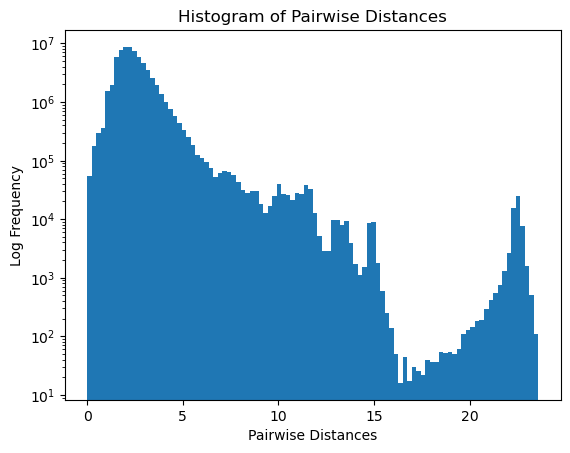

In [36]:


from scipy.spatial.distance import pdist, squareform

# Convert only boolean columns to integers
bool_cols = features.select_dtypes(include=[bool]).columns
features[bool_cols] = features[bool_cols].astype(int)

# Compute pairwise distances
distances = pdist(features.values)

# Plot histogram
plt.hist(distances, bins=100, log=True)  # The `log=True` makes the y-axis logarithmic
plt.title('Histogram of Pairwise Distances')
plt.xlabel('Pairwise Distances')
plt.ylabel('Log Frequency') 
plt.show()


Time to change the eps and min_sample sizes using the insight from the pdist historgram

In [37]:
print(features2.head())

       year    rating      votes  Action  Adventure  Comedy  Crime  Family  \
0  1.224895  1.742687   7.446215    True       True   False  False   False   
1  1.224895  2.147485  12.974548    True       True   False   True   False   
2  0.757138  1.985565  21.957719    True      False   False   True   False   
3  1.224895  2.066525   9.428706    True       True   False  False   False   
4  1.037792  1.985565  10.392021    True       True   False  False   False   

   Fantasy  Mystery  Sci-Fi  Thriller  
0     True    False   False     False  
1    False    False   False     False  
2    False    False   False     False  
3    False    False   False     False  
4    False    False   False     False  


In [67]:
# Create a DBSCAN model wid different eps and min_sample using a copy of features as features2
dbscan2 = DBSCAN(eps=0.75, min_samples=10)

# Fit the model to your data
dbscan2.fit(features2)

# Get the cluster labels for each sample
labels2 = dbscan2.labels_

In [68]:
# Count unique labels (excluding noise if present)
n_clusters = len(np.unique(labels2[labels2 != -1]))

print(f"Number of clusters: {n_clusters}")


Number of clusters: 48


In [69]:
# Create a new DataFrame for storing results
Games_df_34 = Games_df.copy()

# Add these labels to your DataFrame
Games_df_34['Cluster'] = labels2

Games_df_34.head(10)

,name,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,Cluster
0,Spider-Man,2018.0,9.2,20759.0,True,True,False,False,False,True,False,False,False,-1
1,Red Dead Redemption II,2018.0,9.7,35703.0,True,True,False,True,False,False,False,False,False,-1
2,Grand Theft Auto V,2013.0,9.5,59986.0,True,False,False,True,False,False,False,False,False,-1
3,God of War,2018.0,9.6,26118.0,True,True,False,False,False,False,False,False,False,-1
4,Uncharted 4: A Thief's End,2016.0,9.5,28722.0,True,True,False,False,False,False,False,False,False,-1
5,The Last of Us: Part II,2020.0,8.5,30460.0,True,True,False,False,False,False,False,False,False,-1
6,Horizon Forbidden West,2022.0,9.2,2979.0,True,True,False,False,False,False,True,False,False,-1
7,The Last of Us,2013.0,9.7,60590.0,True,True,False,False,False,False,False,False,False,-1
8,Detroit: Become Human,2018.0,9.2,16907.0,True,True,False,False,False,False,False,False,False,-1
9,Death Stranding,2019.0,8.8,8136.0,True,True,False,False,False,False,False,False,False,6


In [70]:
# Add 1 to labels temporarily for counting purpose
labels_temp = labels2 + 1

# Count the occurrences of each cluster ID
counts = np.bincount(labels_temp)

# Create a list of tuples [(cluster_id, count), ...]
cluster_counts = [(cluster_id - 1, count) for cluster_id, count in enumerate(counts)]

# Sort the list in descending order based on the count
cluster_counts_sorted = sorted(cluster_counts, key=lambda x: x[1], reverse=True)

print("First 10 clusters:")
for cluster_id, count in cluster_counts_sorted[:10]:  # First 10
    print(f"Cluster ID {cluster_id} : {count} rows")

print("\nLast 10 clusters:")
for cluster_id, count in cluster_counts_sorted[-10:]:  # Last 10
    print(f"Cluster ID {cluster_id} : {count} rows")


First 10 clusters:
Cluster ID 8 : 1462 rows
Cluster ID 0 : 1426 rows
Cluster ID -1 : 1193 rows
Cluster ID 6 : 1086 rows
Cluster ID 22 : 809 rows
Cluster ID 4 : 699 rows
Cluster ID 9 : 546 rows
Cluster ID 5 : 472 rows
Cluster ID 7 : 467 rows
Cluster ID 40 : 444 rows

Last 10 clusters:
Cluster ID 26 : 24 rows
Cluster ID 32 : 20 rows
Cluster ID 38 : 20 rows
Cluster ID 46 : 16 rows
Cluster ID 35 : 14 rows
Cluster ID 41 : 14 rows
Cluster ID 33 : 12 rows
Cluster ID 3 : 11 rows
Cluster ID 39 : 11 rows
Cluster ID 36 : 8 rows


In [71]:
cluster_stats = Games_df_34[Games_df_34['Cluster'] != -1].groupby('Cluster')[['year', 'rating', 'votes']].agg(['mean', 'std', 'min', 'max'])
print(cluster_stats)


                year                               rating                      \
                mean        std     min     max      mean       std  min  max   
Cluster                                                                         
0        2006.997896   9.750753  1981.0  2022.0  7.396424  1.066008  2.7  9.6   
1        2007.574713   9.397616  1986.0  2022.0  7.201724  0.897619  4.6  9.2   
2        2005.451613  10.193538  1980.0  2022.0  7.129032  0.805547  4.9  8.6   
3        2009.636364   2.730301  2007.0  2013.0  9.118182  0.227236  8.7  9.5   
4        1996.786838  11.807629  1971.0  2021.0  6.588841  1.181952  3.0  8.8   
5        2008.042373   8.491428  1983.0  2022.0  7.286864  1.022256  3.8  9.2   
6        2006.081952   9.530533  1977.0  2022.0  7.206354  1.056822  3.0  9.7   
7        2003.942184   9.606355  1981.0  2022.0  7.129764  0.966117  3.7  9.3   
8        2004.636799  10.609494  1970.0  2022.0  6.666689  1.239535  1.6  9.2   
9        2003.439560  10.032

In [72]:
# Calculate cluster sizes
cluster_sizes = Games_df_34[Games_df_34['Cluster'] != -1]['Cluster'].value_counts()

# Sort cluster sizes in descending order and get the sorted indices
sorted_indices = cluster_sizes.sort_values(ascending=False).index

# Compute cluster statistics and rearrange them according to the sorted indices
cluster_stats = Games_df_34[Games_df_34['Cluster'] != -1].groupby('Cluster')[['year', 'rating', 'votes']].agg(['mean', 'std', 'min', 'max']).loc[sorted_indices]

# Convert cluster_sizes into a DataFrame
cluster_sizes_df = cluster_sizes.reset_index()
cluster_sizes_df.columns = ['Cluster', 'Size']

# Set 'Cluster' as the index in cluster_sizes_df for joining with cluster_stats
cluster_sizes_df.set_index('Cluster', inplace=True)

# Join the dataframes
cluster_stats = cluster_stats.join(cluster_sizes_df)

print(cluster_stats)


    (year, mean)  (year, std)  (year, min)  (year, max)  (rating, mean)  \
8    2004.636799    10.609494       1970.0       2022.0        6.666689   
0    2006.997896     9.750753       1981.0       2022.0        7.396424   
6    2006.081952     9.530533       1977.0       2022.0        7.206354   
22   2008.265760     9.942524       1979.0       2022.0        7.008529   
4    1996.786838    11.807629       1971.0       2021.0        6.588841   
9    2003.439560    10.032471       1979.0       2022.0        7.185714   
5    2008.042373     8.491428       1983.0       2022.0        7.286864   
7    2003.942184     9.606355       1981.0       2022.0        7.129764   
40   1998.027027    11.874216       1972.0       2022.0        6.285586   
24   2002.658621    11.794844       1976.0       2022.0        7.522414   
11   2002.525362    11.015827       1980.0       2022.0        7.056159   
42   2007.362903     9.110953       1982.0       2022.0        7.032258   
45   2005.799065    10.71

C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_22424\1293097628.py:18: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  cluster_stats = cluster_stats.join(cluster_sizes_df)


In [74]:
# Compute the mean of each cluster
cluster_centers = Games_df_34.groupby('Cluster').mean()

print(cluster_centers)


                year    rating         votes    Action  Adventure    Comedy  \
Cluster                                                                       
-1       2005.020117  6.848365   3339.105616  0.537301   0.418273  0.200335   
 0       2006.997896  7.396424    621.847125  1.000000   1.000000  0.000000   
 1       2007.574713  7.201724    742.764368  1.000000   1.000000  0.000000   
 2       2005.451613  7.129032    191.475806  1.000000   0.000000  0.000000   
 3       2009.636364  9.118182  19214.636364  1.000000   1.000000  0.000000   
 4       1996.786838  6.588841    197.721030  1.000000   0.000000  0.000000   
 5       2008.042373  7.286864    463.048729  1.000000   1.000000  1.000000   
 6       2006.081952  7.206354    495.960405  1.000000   1.000000  0.000000   
 7       2003.942184  7.129764    407.239829  1.000000   1.000000  0.000000   
 8       2004.636799  6.666689     85.412449  1.000000   0.000000  0.000000   
 9       2003.439560  7.185714    323.620879  1.0000

C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_22424\262494300.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_centers = Games_df_34.groupby('Cluster').mean()
